In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

ImportError: cannot import name 'confusion_matrix' from 'sklearn.model_selection' (/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/__init__.py)

In [ ]:
df = pd.read_csv("/kaggle/input/weather-type-classification/weather_classification_data.csv")

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [268]:
df.describe(include=['object'])

,Cloud Cover,Season,Location,Weather Type
count,11709,11709,11709,11709
unique,4,4,3,4
top,overcast,Winter,inland,Cloudy
freq,5507,5131,4314,2993


I am checking to see if there any empty rows.

In [269]:
print(df.isna().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


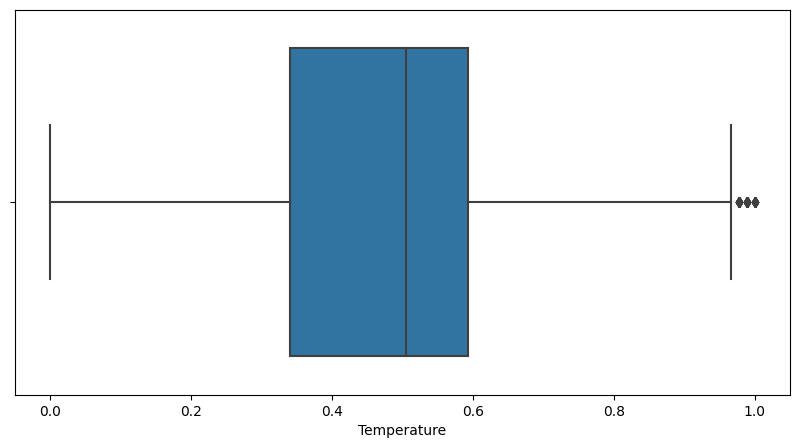

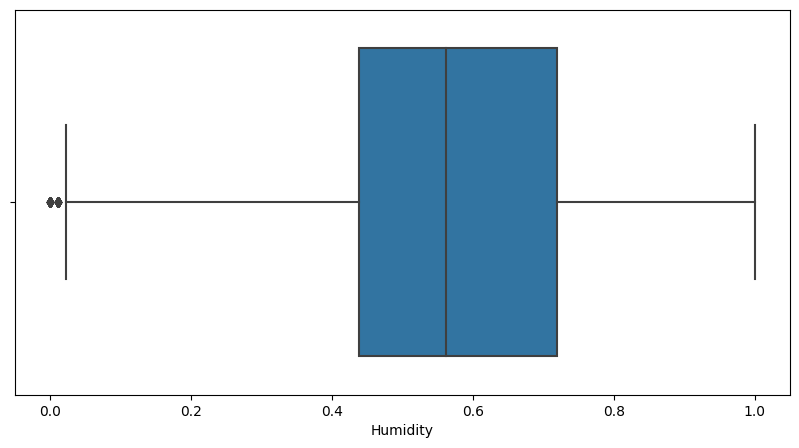

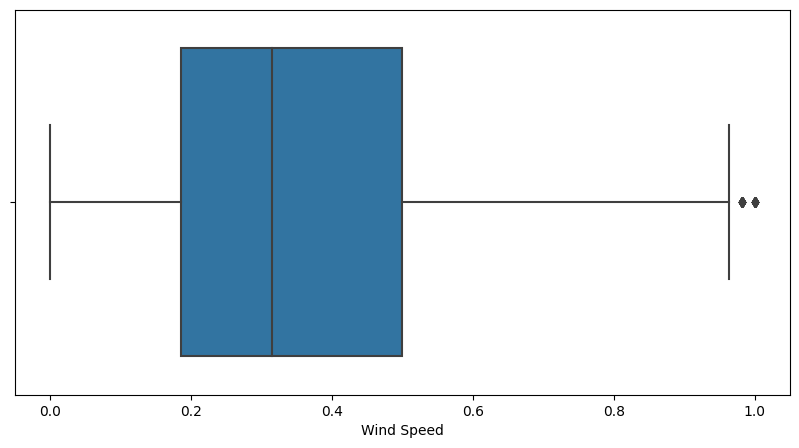

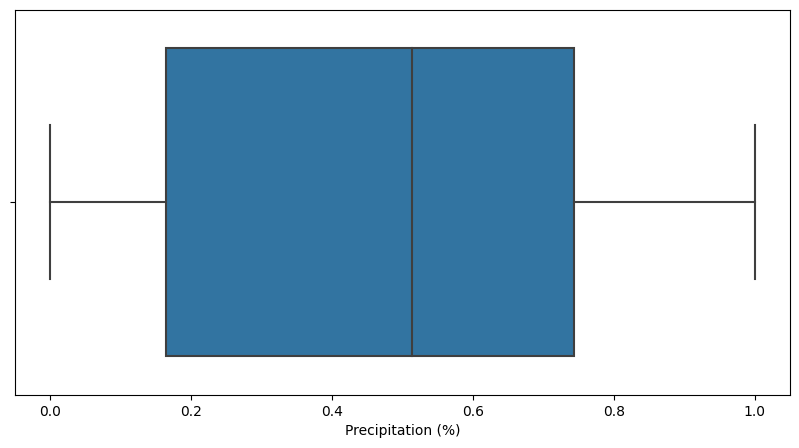

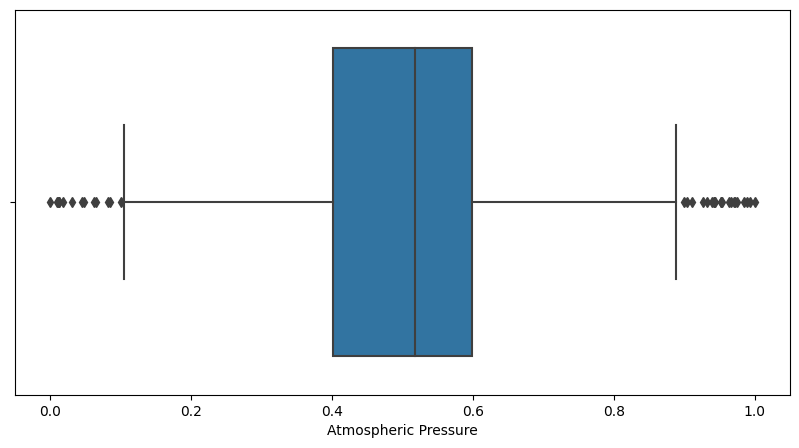

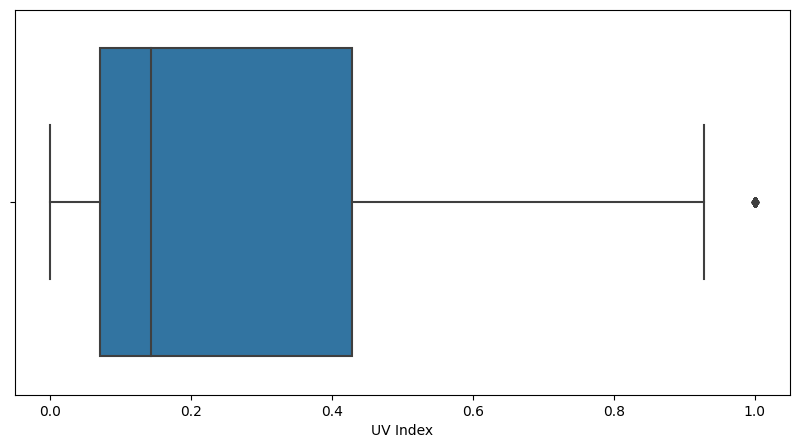

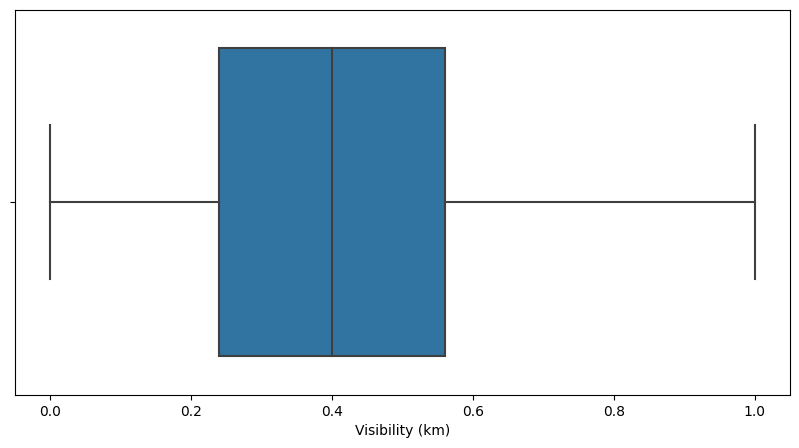

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0.417582,0.595506,0.351852,0.752294,partly cloudy,0.546361,0.142857,Winter,0.28,inland,Rainy
1,0.692308,0.853933,0.314815,0.651376,partly cloudy,0.552265,0.500000,Spring,0.80,inland,Cloudy
2,0.593407,0.494382,0.259259,0.146789,clear,0.622822,0.357143,Spring,0.44,mountain,Sunny
3,0.681319,0.707865,0.055556,0.752294,clear,0.695703,0.500000,Spring,0.08,coastal,Sunny
4,0.560440,0.606742,0.629630,0.605505,overcast,0.351336,0.071429,Winter,0.20,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
11704,0.582418,0.471910,0.481481,0.155963,overcast,0.468835,0.142857,Spring,0.40,coastal,Cloudy
11705,0.373626,0.606742,0.537037,0.651376,overcast,0.472125,0.071429,Summer,0.08,mountain,Rainy
11706,0.593407,0.640449,0.203704,0.256881,overcast,0.564460,0.214286,Autumn,0.72,coastal,Cloudy
11707,0.296703,0.629213,0.370370,0.862385,overcast,0.289392,0.000000,Winter,0.16,inland,Snowy


In [270]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=column)
    plt.show()
df

In [271]:
outliers_counts = {}
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        z_scores = np.abs(stats.zscore(df[column]))
        outliers_count = np.sum(z_scores > 3)
        outliers_counts[column] = outliers_count
print(outliers_counts)

{'Temperature': 9, 'Humidity': 0, 'Wind Speed': 46, 'Precipitation (%)': 0, 'Atmospheric Pressure': 44, 'UV Index': 0, 'Visibility (km)': 0}


In this section I am dropping out the indexes which has at least 1 outlier column within in it's row using z-score

In [272]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        z_scores = np.abs(stats.zscore(df[column]))
        df = df[z_scores < 3]
df.reset_index(drop=True, inplace=True)

In this section I am normalising the numerical data using min max scaling.

In [273]:
for column in df.columns: 
    if df[column].dtype in ['float64', 'int64']:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [274]:
Y_labels = df["Weather Type"]
Y_labels = pd.get_dummies(Y_labels, drop_first=True)
print(Y_labels)
X_data = df.select_dtypes("float64")
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_labels, test_size=.2, random_state=42)

       Rainy  Snowy  Sunny
0       True  False  False
1      False  False  False
2      False  False   True
3      False  False   True
4       True  False  False
...      ...    ...    ...
11605  False  False  False
11606   True  False  False
11607  False  False  False
11608  False   True  False
11609   True  False  False

[11610 rows x 3 columns]


In [275]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [280]:
y_pred = rf.predict(x_test)

,precision,recall,f1-score,support
0,0.981516,0.965455,0.973419,550.0
1,0.996516,0.987910,0.992194,579.0
2,0.981949,0.949389,0.965395,573.0
micro avg,0.986818,0.967685,0.977158,1702.0
macro avg,0.986660,0.967585,0.977003,1702.0
weighted avg,0.986765,0.967685,0.977105,1702.0
samples avg,0.709302,0.709302,0.709302,1702.0


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()


In [281]:
df_classification_report

,precision,recall,f1-score,support
0,0.981516,0.965455,0.973419,550.0
1,0.996516,0.987910,0.992194,579.0
2,0.981949,0.949389,0.965395,573.0
micro avg,0.986818,0.967685,0.977158,1702.0
macro avg,0.986660,0.967585,0.977003,1702.0
weighted avg,0.986765,0.967685,0.977105,1702.0
samples avg,0.709302,0.709302,0.709302,1702.0


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_classification_report[['precision', 'recall', 'f1-score']].astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Classification Report Heatmap')
plt.show()